# Predicting Customer Churn in the Telecom Industry: A Machine Learning Approach

This project focuses on customer churn, a critical concern for businesses aiming to retain their customer base. Customer churn, the phenomenon where customers discontinue their services, can significantly impact the revenue and sustainability of a business, making it crucial for companies to proactively monitor and address churn.  [1] In the dynamic landscape of the telecom industry, the ability to foresee and address customer churn is a pivotal concern for businesses striving to maintain a loyal customer base.

A comprehensive sample dataset from a California-based telecom company was utilized containing a wealth of information including customer interactions, service usage, and demographic details. [2] The inclusion of features, such as tenure, contract type, and service subscription details, provides a firm foundation for understanding the potential factors influencing customer churn.

For organizations leveraging machine learning, understanding the different algorithms and methodologies is crucial for navigating its evolving landscape. A fundamental distinction, for instance, involves the categorization between supervised and unsupervised learning. In supervised learning, models are trained on labeled datasets, where the algorithm learns from historical data to make predictions or decisions. Unsupervised learning, on the other hand, deals with unlabeled data, focusing on discovering patterns or relationships within the data itself. [3]

There's a further distinction between linear and logistic regression within supervised learning. Linear regression excels in predicting continuous outcomes, making it valuable for scenarios where the target variable is a continuous numerical value. Logistic regression however is tailored classification problems, where the goal is to categorize instances into distinct categorical classes. Understanding the contextual applications of these algorithms enhances their utility in addressing diverse real-world challenges.[4]

To tackle this issue on customer churn, the project will identify key factors influencing churn and leverage logistic regression to develop a predictive binary classification model. By exploring and addressing this pertinent issue, the aim is to showcase a practical application of machine learning within a business context.

## Downloading Dataset

In [1]:
#Importing necessary libraries for data analysis and visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Installing the opendatasets library quietly
!pip install opendatasets --upgrade --quiet

In [3]:
#Kaggle dataset URL containing air pollution information for Seoul
dataset_url = 'https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics?select=telecom_zipcode_population.csv'

In [4]:
#Downloading dataset using the opendatasets library
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\telecom-customer-churn-by-maven-analytics" (use force=True to force download)


In [5]:
#Specifying directory path where files are stored and listed
import os
data_dir = './telecom-customer-churn-by-maven-analytics'
os.listdir(data_dir)

['telecom_customer_churn.csv',
 'telecom_data_dictionary.csv',
 'telecom_zipcode_population.csv']

## Data Preparation

Before diving into model building, it's essential to explore the dataset and gain insights into the underlying trends. This starts off with visualizing the distribution of various categorical variables, such as gender, offer type, and internet service, in addition to the distribution of numeric variables across different customer churn statuses using box plots.

In [6]:
#Constructing the file path for the CSV data
csv_file_path = os.path.join(data_dir, 'telecom_customer_churn.csv')
df = pd.read_csv(csv_file_path)
df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [7]:
#Making a copy for processing
df = df.copy()

In [8]:
#Removing spaces from column names and converting them to lowercase
df.columns=df.columns.str.replace(" ","").str.lower()
df

,customerid,gender,age,married,numberofdependents,city,zipcode,latitude,longitude,numberofreferrals,...,paymentmethod,monthlycharge,totalcharges,totalrefunds,totalextradatacharges,totallongdistancecharges,totalrevenue,customerstatus,churncategory,churnreason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [9]:
#Removing Joined customer status
unique_values = df['customerstatus'].unique()
print(unique_values)

['Stayed' 'Churned' 'Joined']


In [10]:
#Filtering out rows where 'customerstatus' contains the string 'Join'
df=df.loc[~df['customerstatus'].str.contains('Join')]

#Resetting the index after filtering and dropping the previous index column
df.reset_index(drop=True,inplace=True)
df.shape

(6589, 38)

In [11]:
#Checking for missing values in each column of the DataFrame
df.isnull().sum()

customerid                          0
gender                              0
age                                 0
married                             0
numberofdependents                  0
city                                0
zipcode                             0
latitude                            0
longitude                           0
numberofreferrals                   0
tenureinmonths                      0
offer                               0
phoneservice                        0
avgmonthlylongdistancecharges     644
multiplelines                     644
internetservice                     0
internettype                     1344
avgmonthlygbdownload             1344
onlinesecurity                   1344
onlinebackup                     1344
deviceprotectionplan             1344
premiumtechsupport               1344
streamingtv                      1344
streamingmovies                  1344
streamingmusic                   1344
unlimiteddata                    1344
contract    

In [12]:
df_copy = df.copy()

#Replace missing values in numeric columns with 0
numeric_columns = ['avgmonthlylongdistancecharges', 'avgmonthlygbdownload']
for column in numeric_columns:
    df_copy[column].fillna(0, inplace=True)

#Replace missing values in categorical columns with "No"
categorical_columns = ['multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotectionplan', 'premiumtechsupport', 
                       'streamingtv', 'streamingmovies', 'streamingmusic', 'unlimiteddata']
for column in categorical_columns:
    df_copy[column].fillna("No", inplace=True)

#Replace missing values in categorical columns with "No Service"
categorical_columns = ['internettype']
for column in categorical_columns:
    df_copy[column].fillna("No Service", inplace=True)

null_counts = df_copy.isnull().sum()
print(null_counts)

customerid                          0
gender                              0
age                                 0
married                             0
numberofdependents                  0
city                                0
zipcode                             0
latitude                            0
longitude                           0
numberofreferrals                   0
tenureinmonths                      0
offer                               0
phoneservice                        0
avgmonthlylongdistancecharges       0
multiplelines                       0
internetservice                     0
internettype                        0
avgmonthlygbdownload                0
onlinesecurity                      0
onlinebackup                        0
deviceprotectionplan                0
premiumtechsupport                  0
streamingtv                         0
streamingmovies                     0
streamingmusic                      0
unlimiteddata                       0
contract    

In [13]:
#List of potential variables
p_vars = ['gender', 'age', 'married', 'numberofdependents', 
            'numberofreferrals', 'tenureinmonths', 'offer', 'phoneservice', 'avgmonthlylongdistancecharges', 'multiplelines', 'internetservice', 
            'internettype', 'avgmonthlygbdownload', 'onlinesecurity', 'onlinebackup', 'deviceprotectionplan', 'premiumtechsupport', 'streamingtv', 
            'streamingmovies', 'streamingmusic', 'unlimiteddata', 'contract', 'paperlessbilling', 'paymentmethod', 
            'monthlycharge', 'totalcharges', 'totalextradatacharges', 'totallongdistancecharges', 
            'totalrevenue']

#Observing data type
data_types = df_copy[p_vars].dtypes
print(data_types)

gender                            object
age                                int64
married                           object
numberofdependents                 int64
numberofreferrals                  int64
tenureinmonths                     int64
offer                             object
phoneservice                      object
avgmonthlylongdistancecharges    float64
multiplelines                     object
internetservice                   object
internettype                      object
avgmonthlygbdownload             float64
onlinesecurity                    object
onlinebackup                      object
deviceprotectionplan              object
premiumtechsupport                object
streamingtv                       object
streamingmovies                   object
streamingmusic                    object
unlimiteddata                     object
contract                          object
paperlessbilling                  object
paymentmethod                     object
monthlycharge   

<Figure size 1400x600 with 0 Axes>

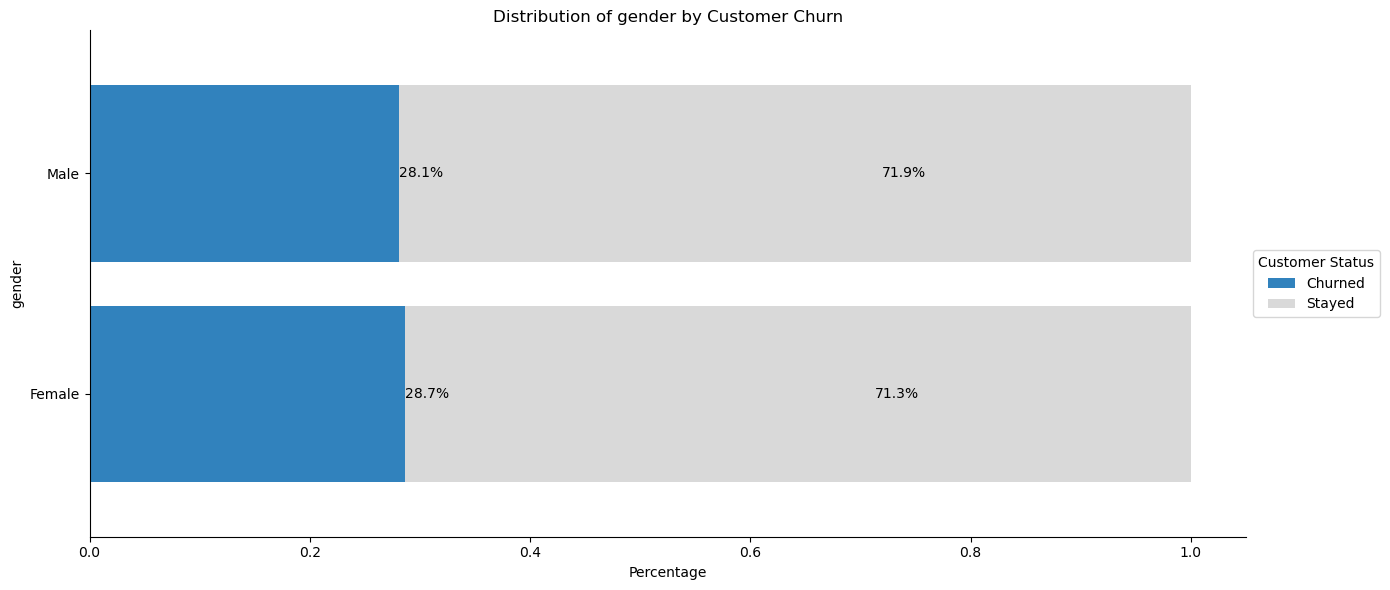

<Figure size 1400x600 with 0 Axes>

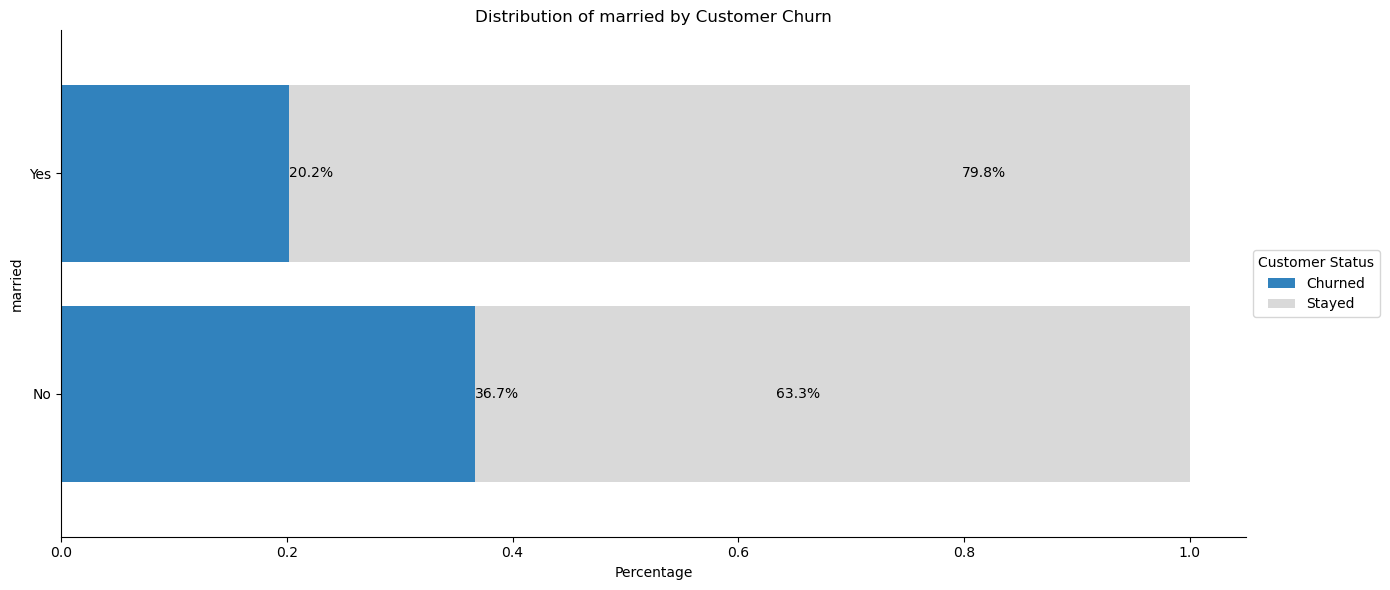

<Figure size 1400x600 with 0 Axes>

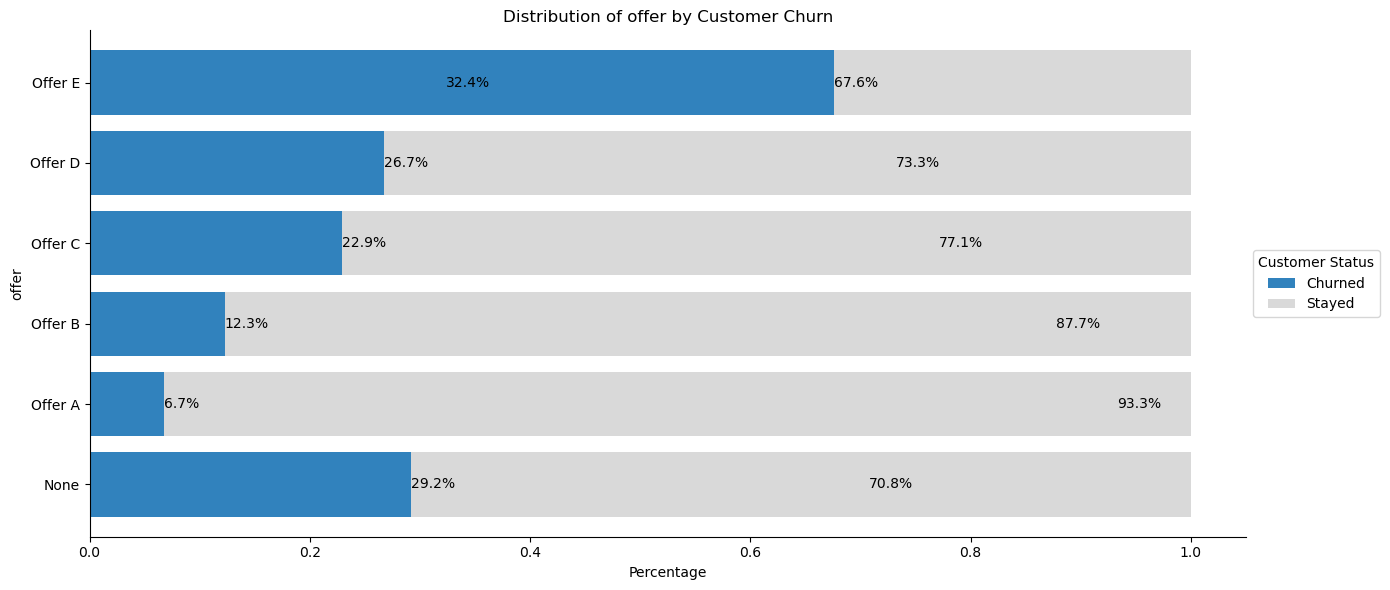

<Figure size 1400x600 with 0 Axes>

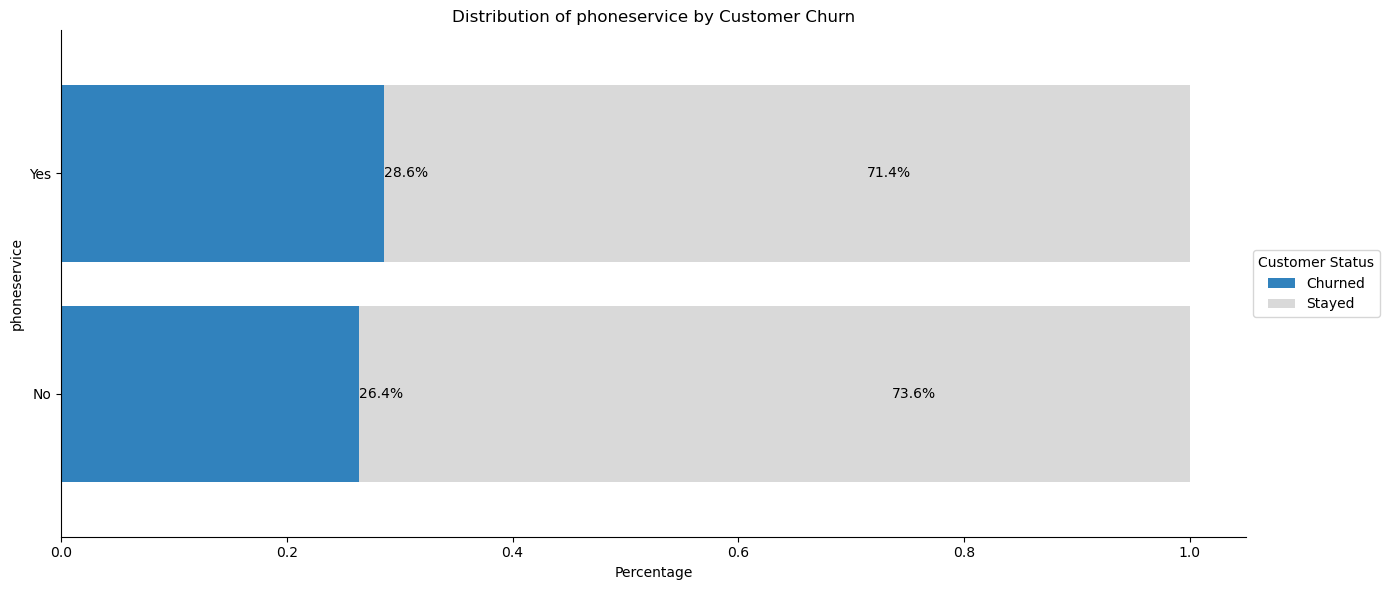

<Figure size 1400x600 with 0 Axes>

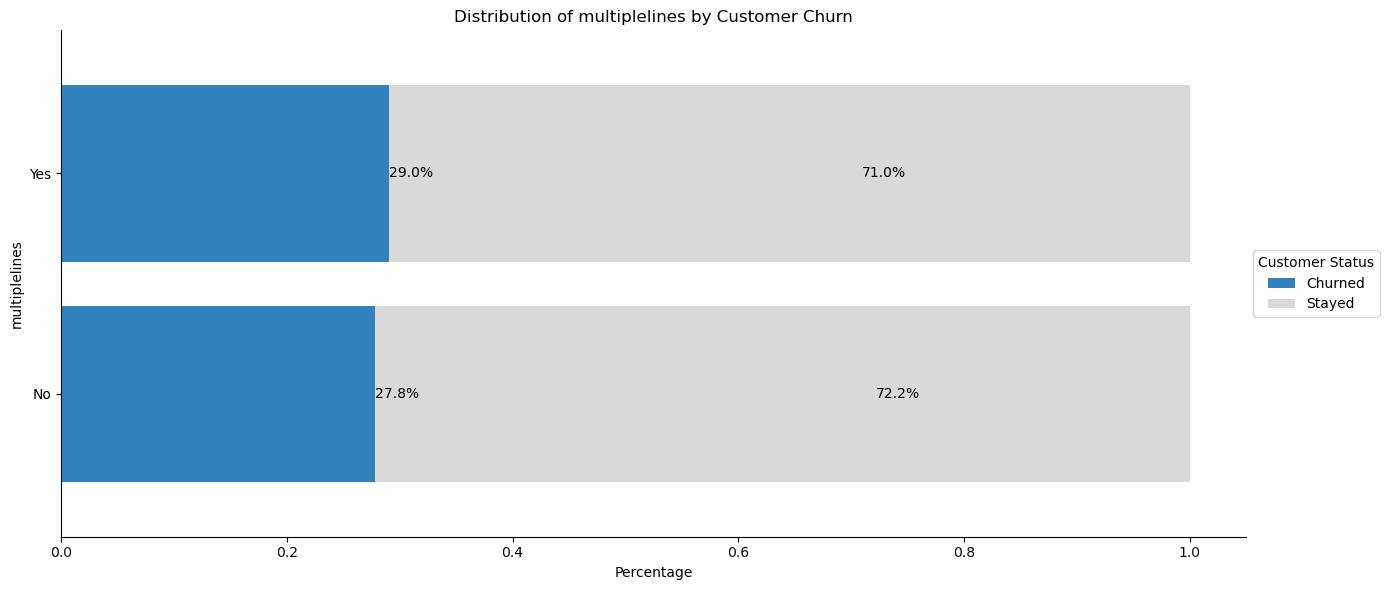

<Figure size 1400x600 with 0 Axes>

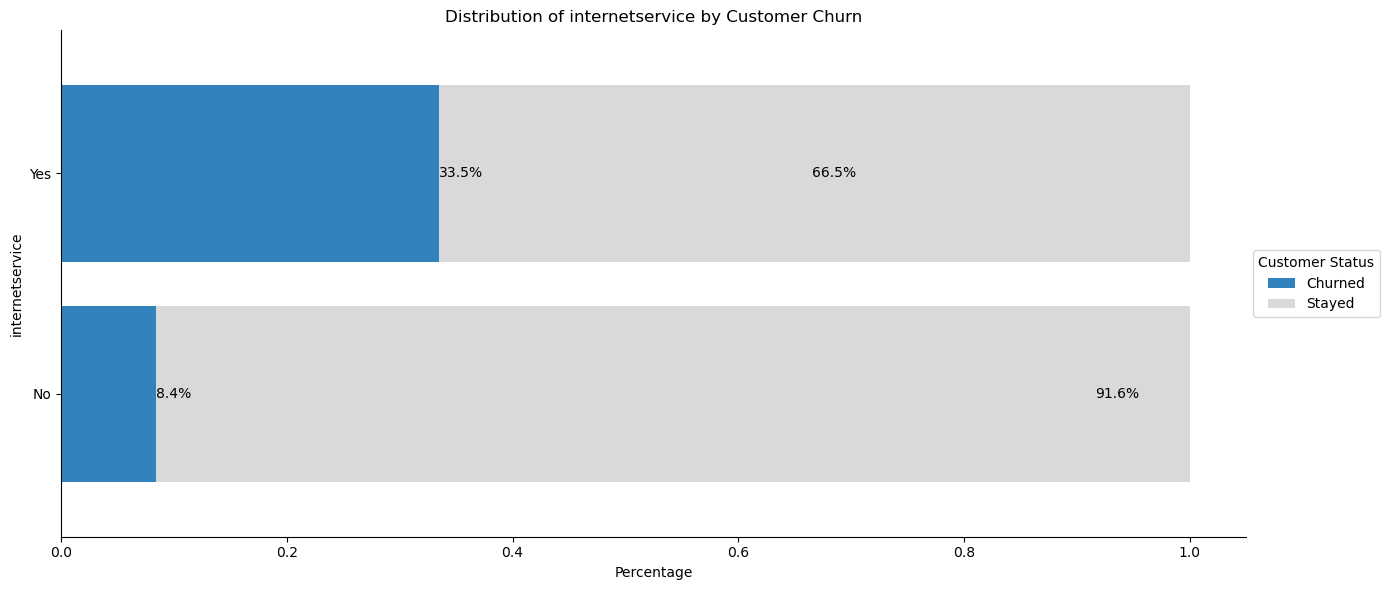

<Figure size 1400x600 with 0 Axes>

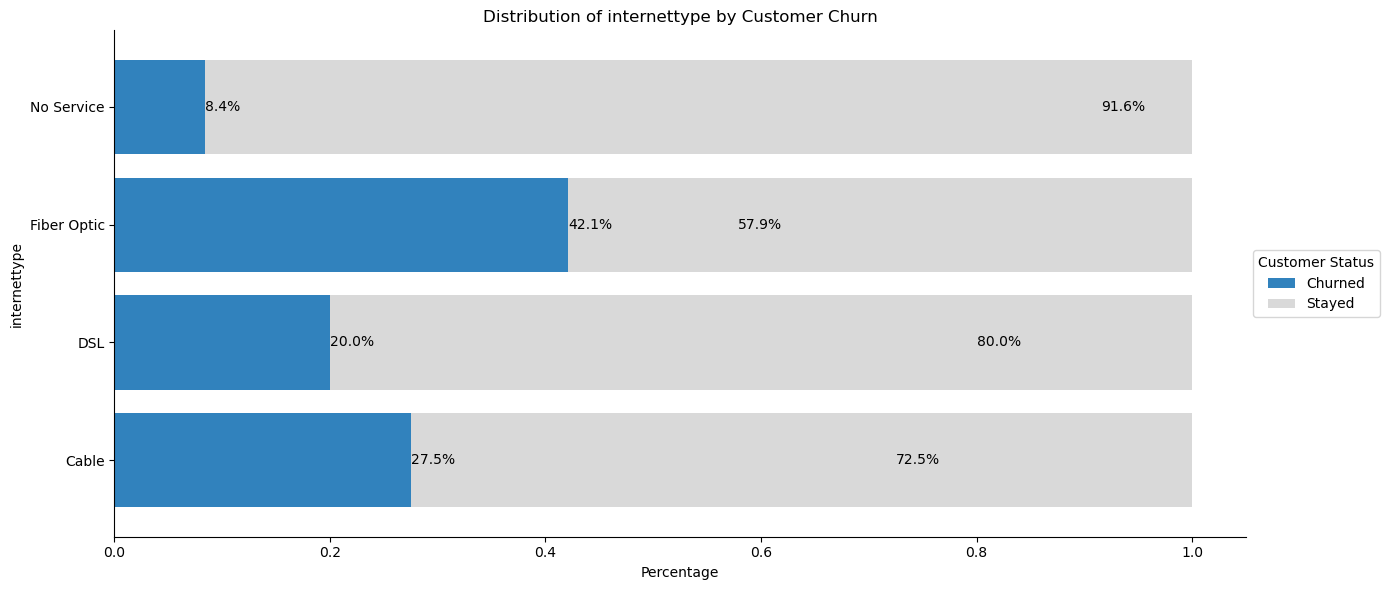

<Figure size 1400x600 with 0 Axes>

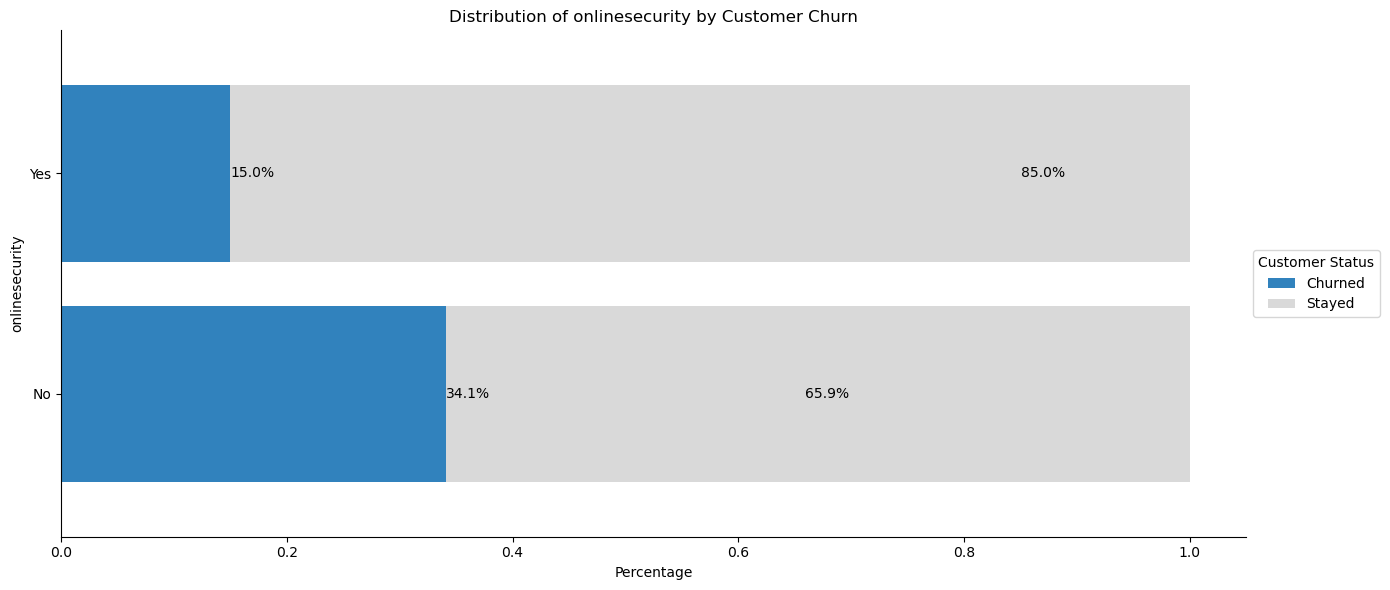

<Figure size 1400x600 with 0 Axes>

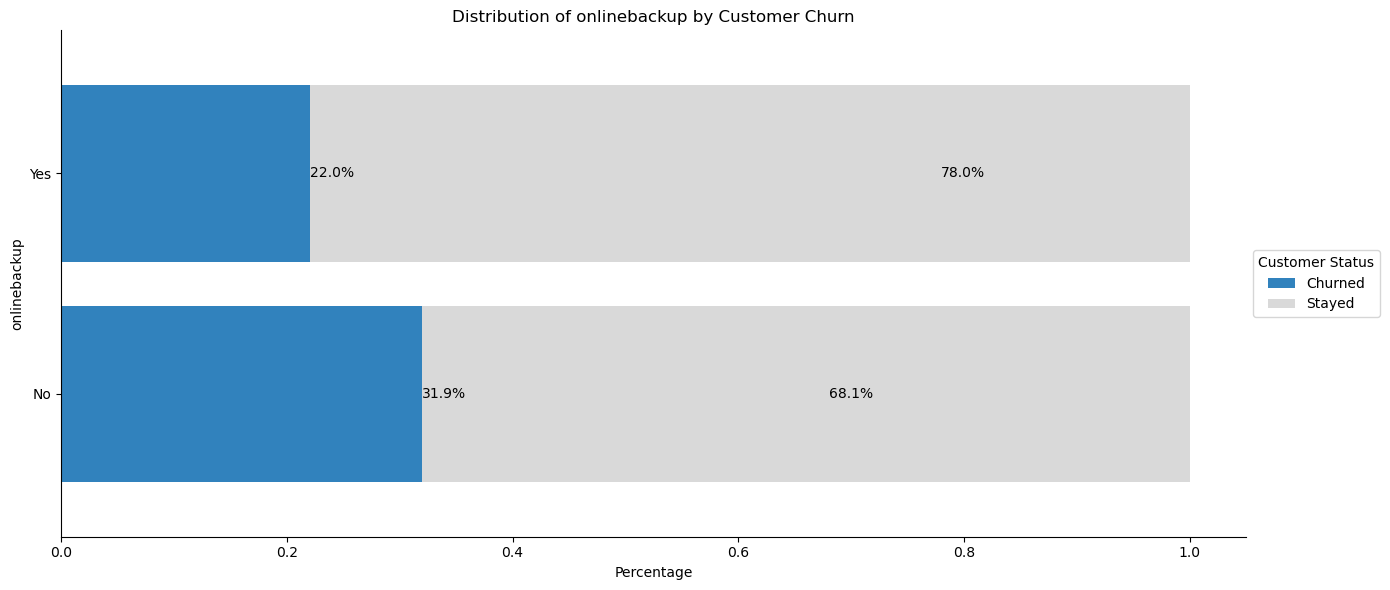

<Figure size 1400x600 with 0 Axes>

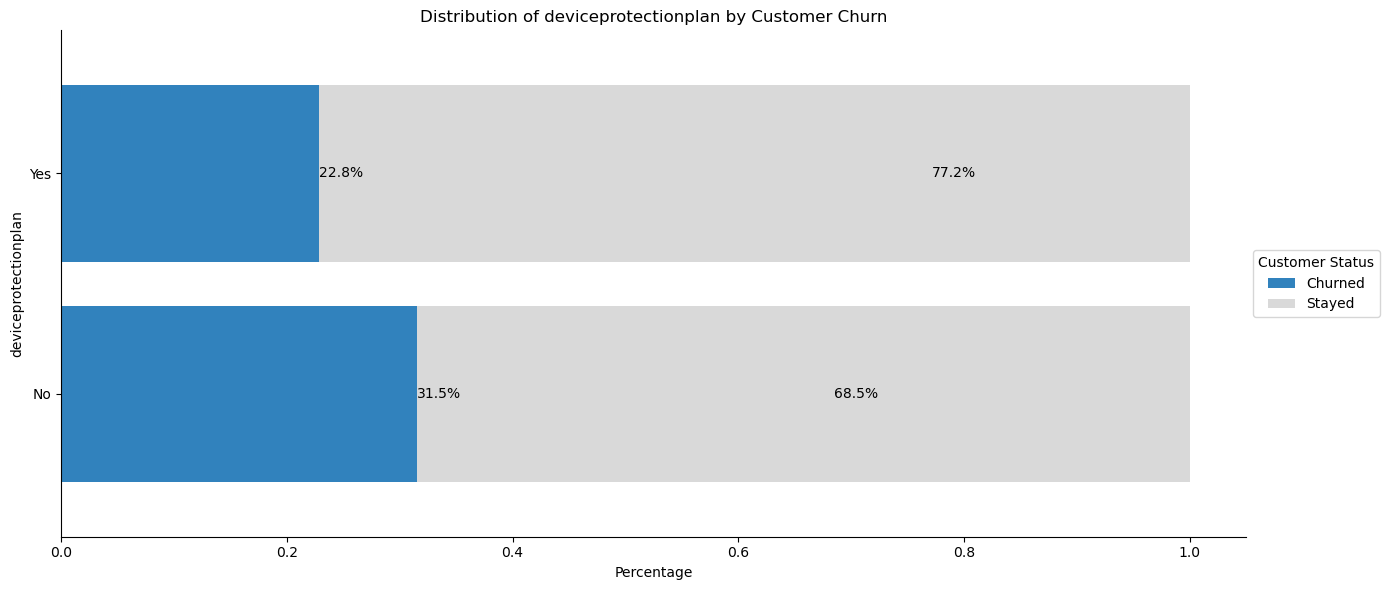

<Figure size 1400x600 with 0 Axes>

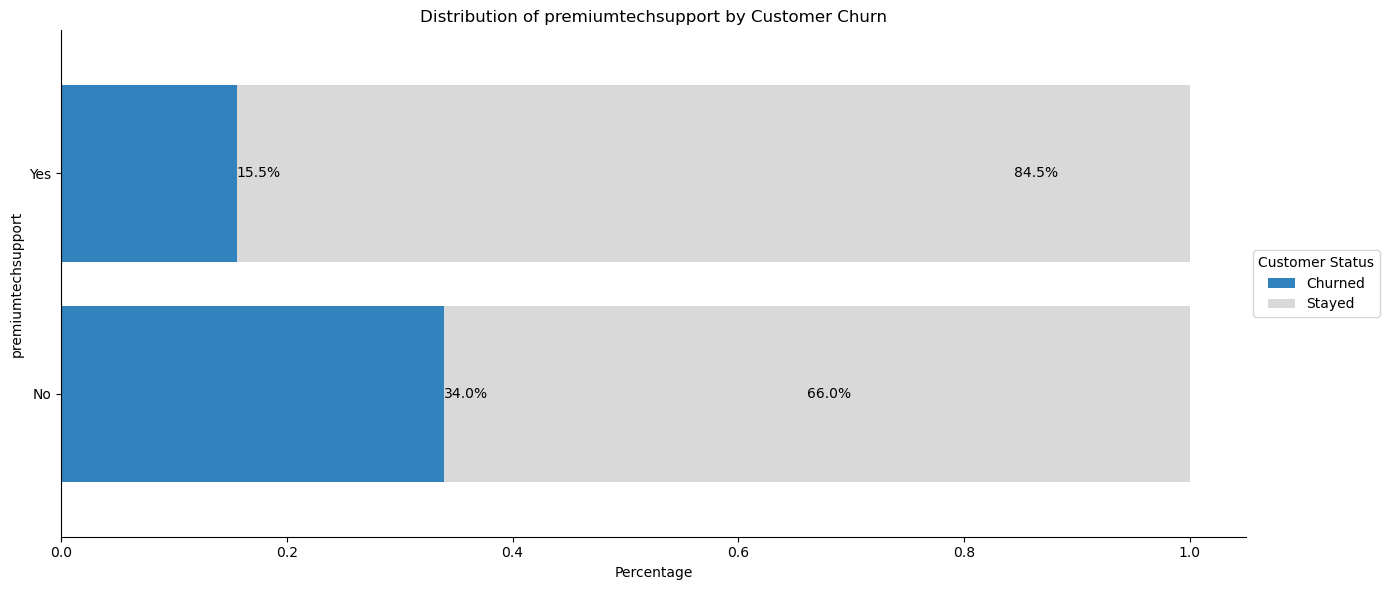

<Figure size 1400x600 with 0 Axes>

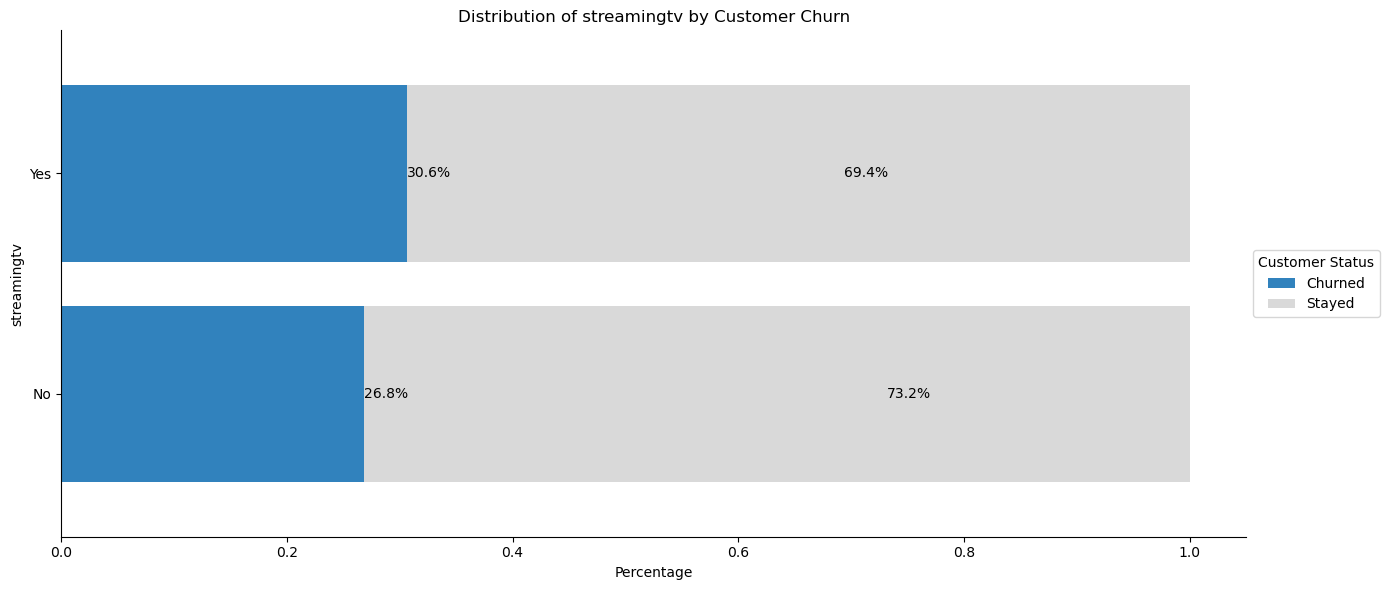

<Figure size 1400x600 with 0 Axes>

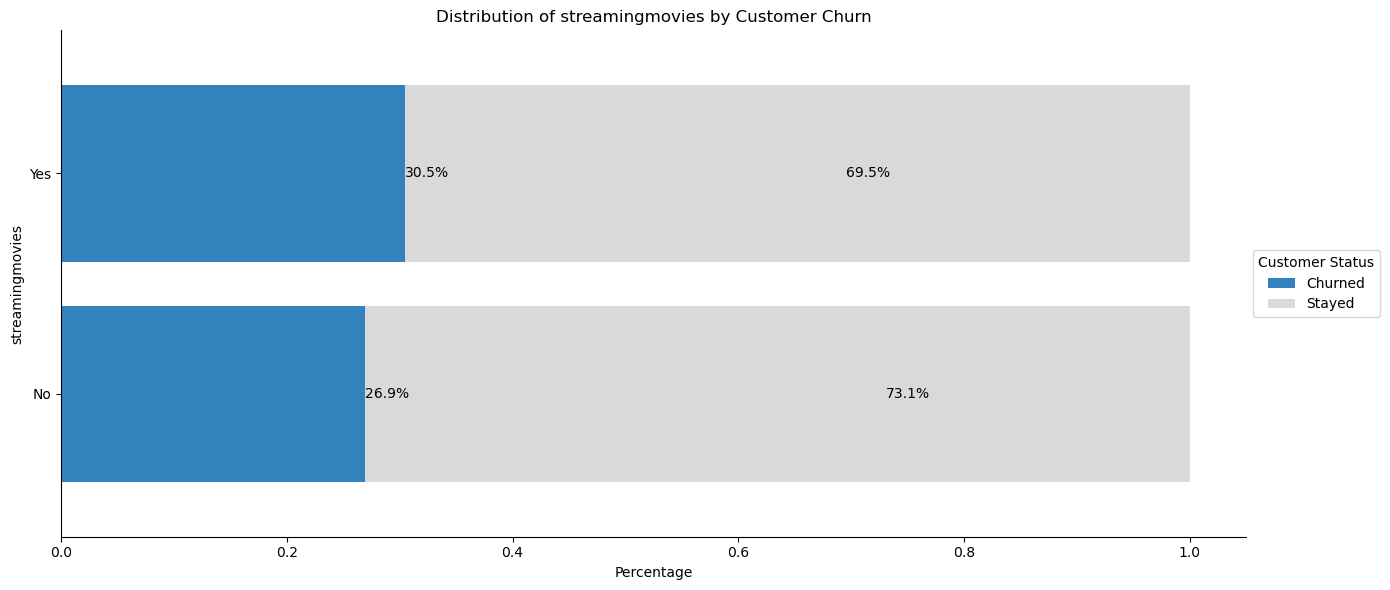

<Figure size 1400x600 with 0 Axes>

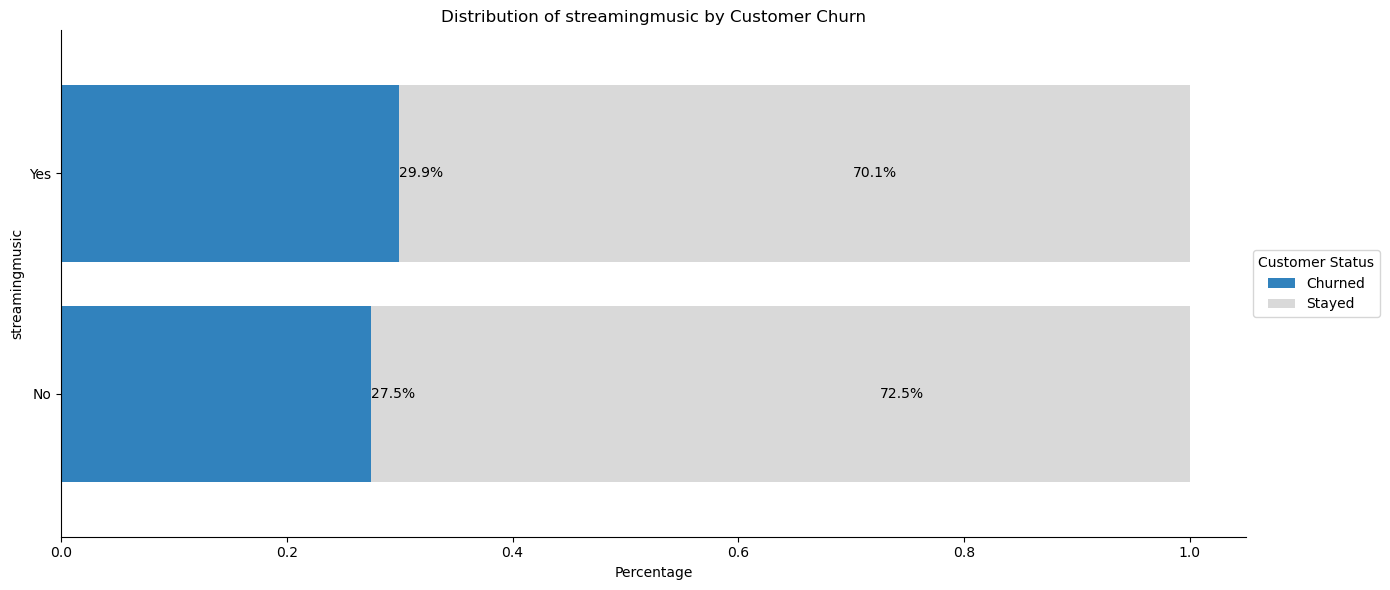

<Figure size 1400x600 with 0 Axes>

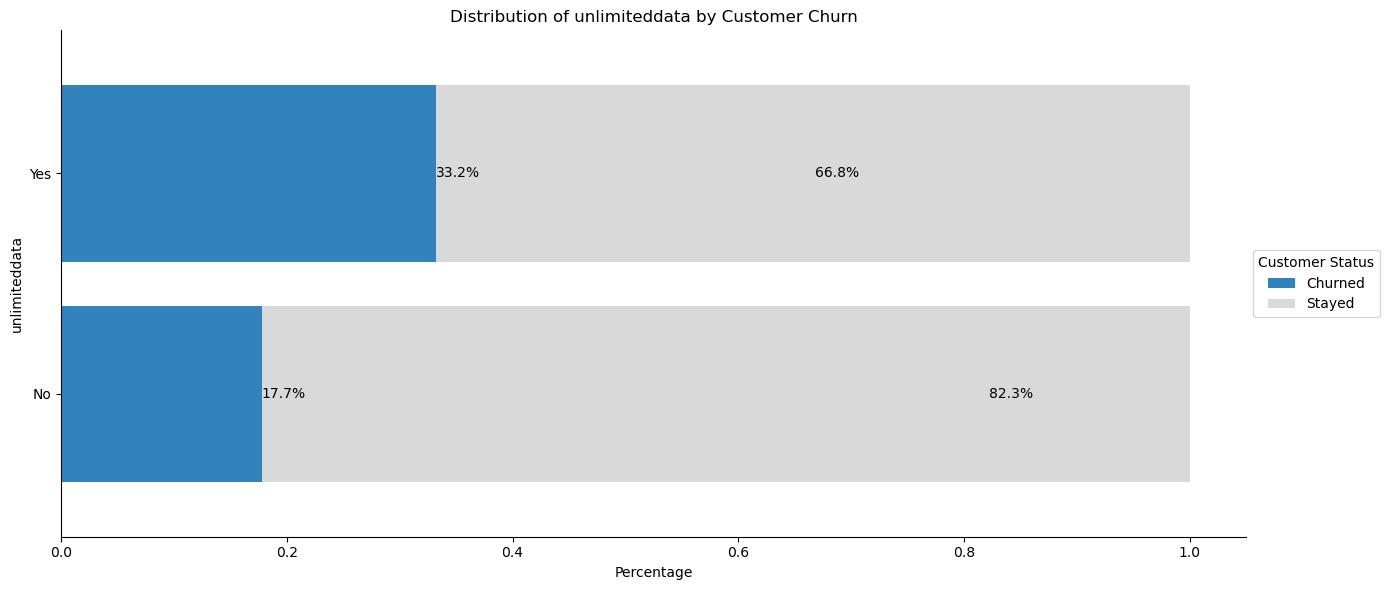

<Figure size 1400x600 with 0 Axes>

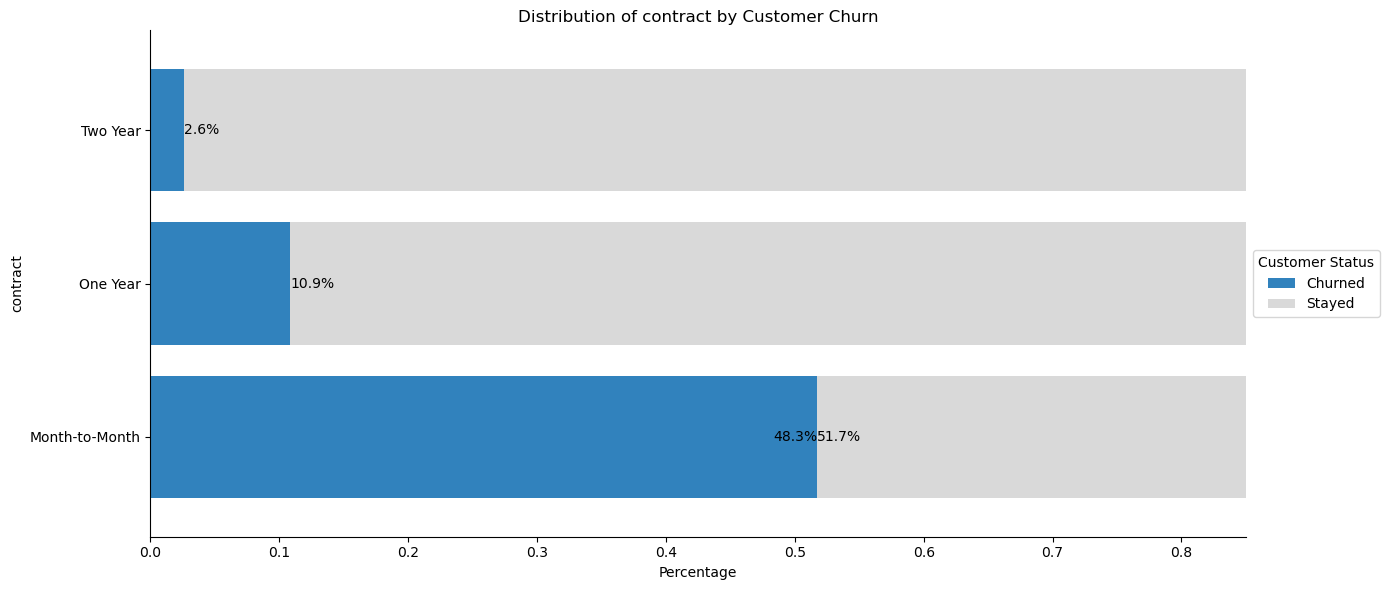

<Figure size 1400x600 with 0 Axes>

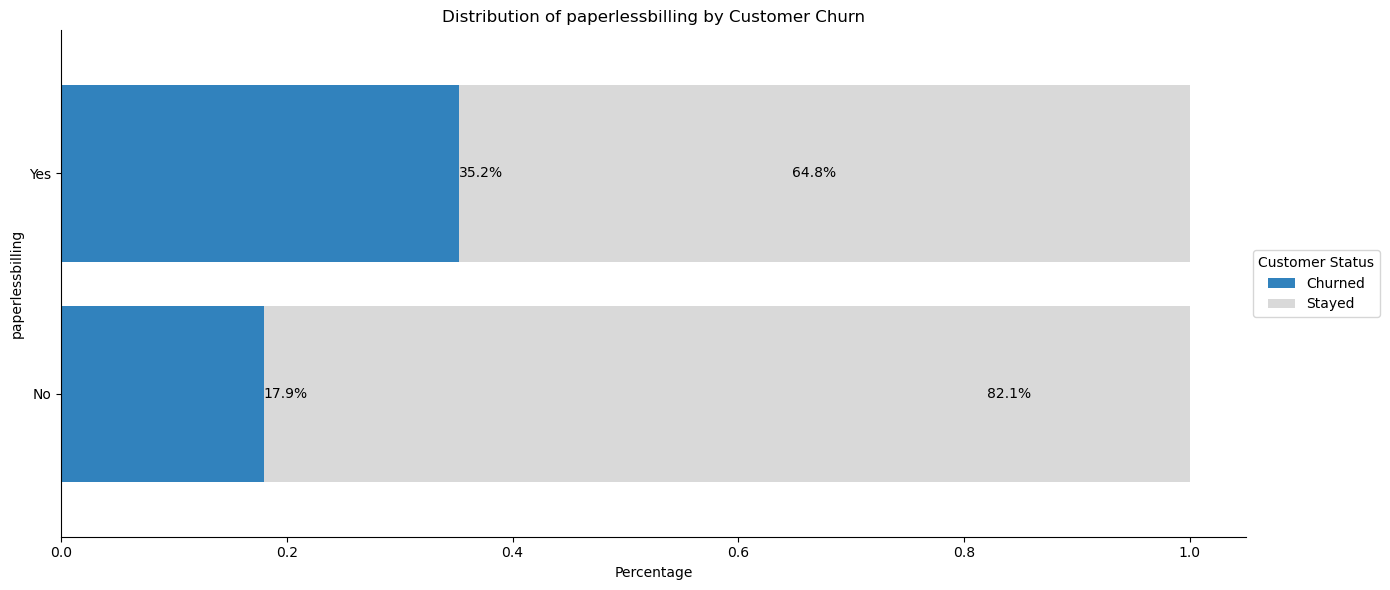

<Figure size 1400x600 with 0 Axes>

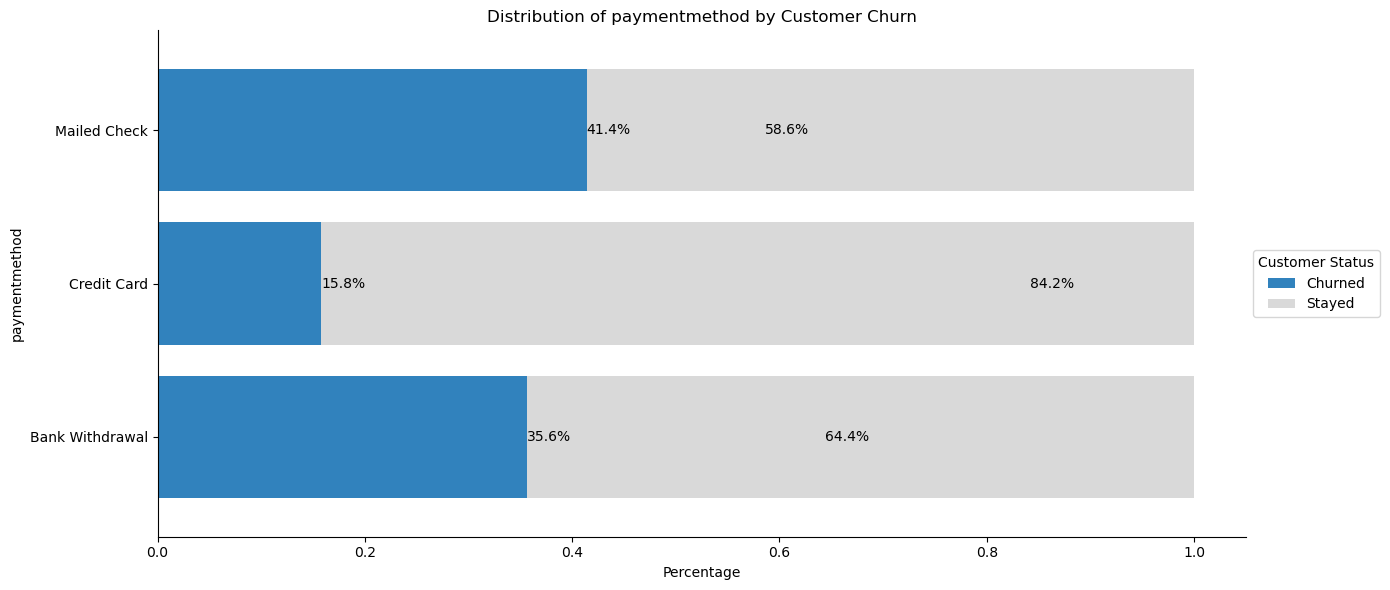

In [14]:
from matplotlib.ticker import MaxNLocator

#List of categorical variables
cat_vars = ['gender', 'married', 'offer', 'phoneservice', 'multiplelines', 'internetservice', 'internettype',
            'onlinesecurity', 'onlinebackup', 'deviceprotectionplan', 'premiumtechsupport', 'streamingtv',
            'streamingmovies', 'streamingmusic', 'unlimiteddata', 'contract', 'paperlessbilling', 'paymentmethod']

def plot_categorical_distribution(data, var):
    plt.figure(figsize=(14, 6))  # Increase the figure size

    #Create a dataframe for the counts
    count_df = data.groupby([var, 'customerstatus']).size().unstack().fillna(0)

    #Calculate percentages and plot a stacked horizontal bar chart
    stacked_data = count_df.div(count_df.sum(1), axis=0)
    ax = stacked_data.plot(kind='barh', stacked=True, colormap='tab20c', figsize=(14, 6), width=0.8)  # Increase bar width
    plt.title(f'Distribution of {var} by Customer Churn')
    plt.xlabel('Percentage')
    plt.ylabel(var)
    
    # Remove top and right borders
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    
    plt.legend(title='Customer Status', loc='center left', bbox_to_anchor=(1.0, 0.5))

    #Adjust the layout for better readability
    plt.tight_layout()

    #Adjust the space between bars for specific cases
    if var == 'contract':
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Force integer tick positions
        ax.set_xlim([0, 0.85])  # Adjust the x-axis limits to create more space

    #Rotate y-axis labels
    plt.yticks(rotation=0)

    #Annotate the bars with percentages
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(f'{width:.1%}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center')

    plt.show()

#Loop through each categorical variable and plot distribution
for var in cat_vars:
    plot_categorical_distribution(df_copy, var)

Stacked bar charts illustrating the percentage distribution of various categorical variables in telecom dataset, showcasing factors influencing churn status.

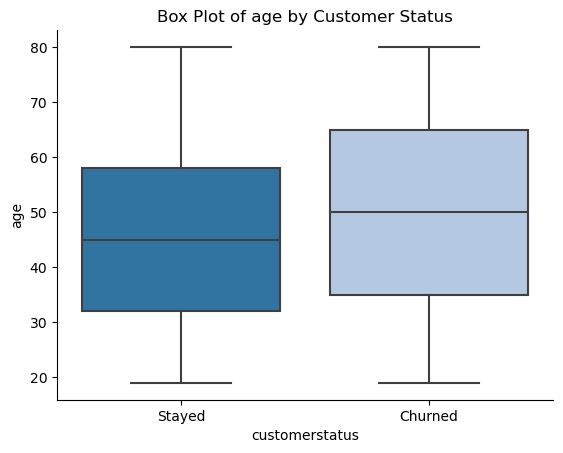

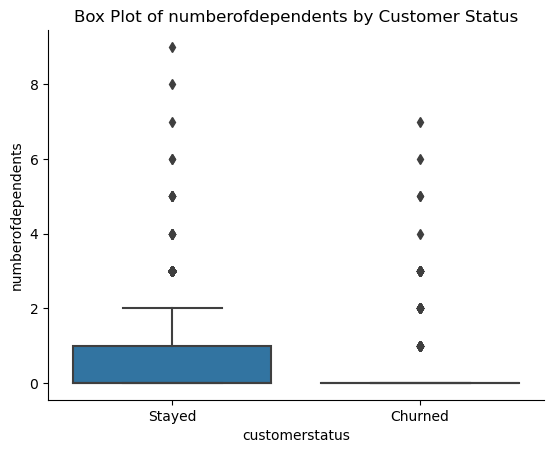

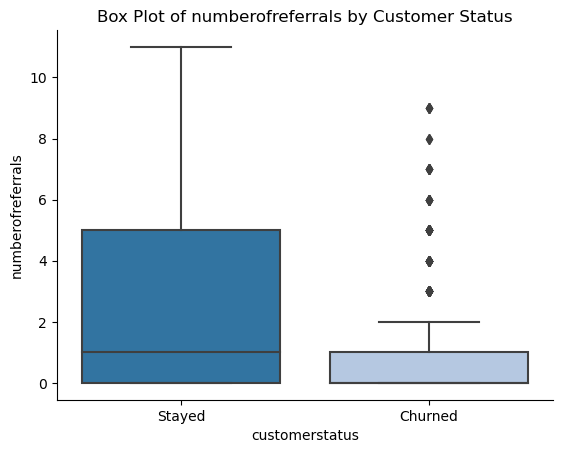

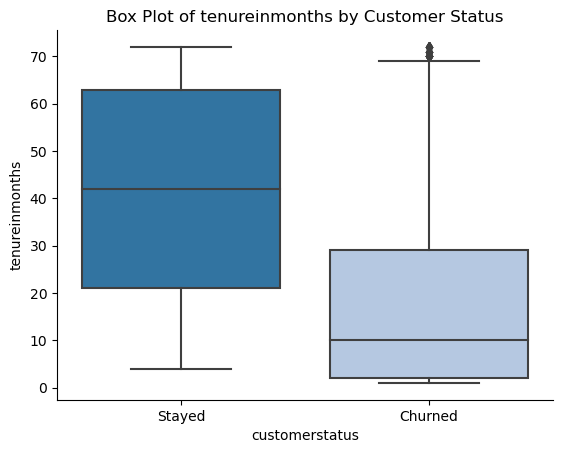

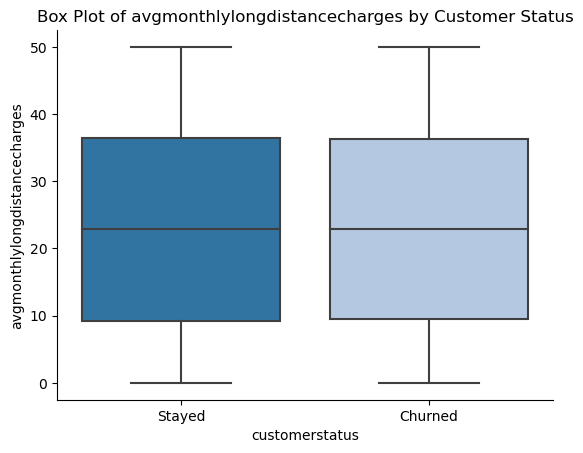

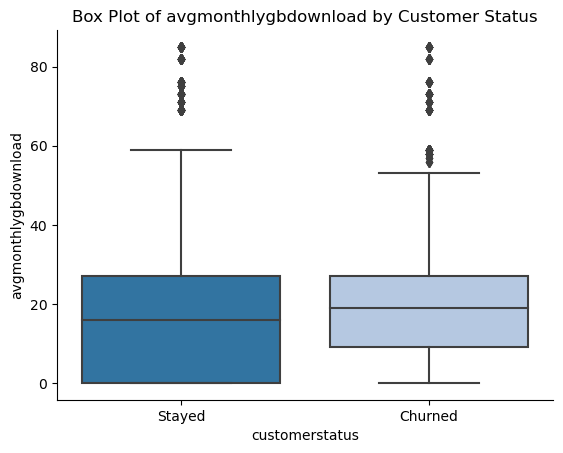

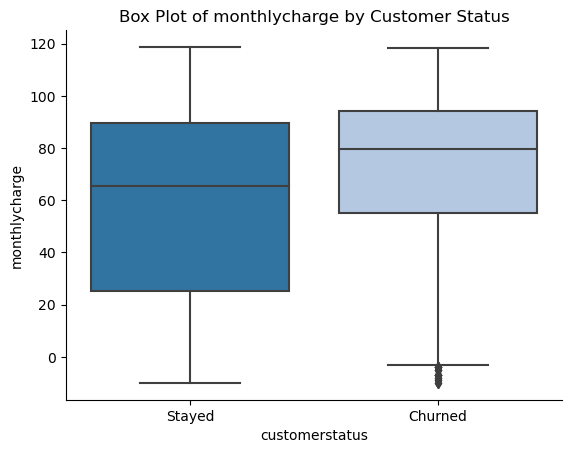

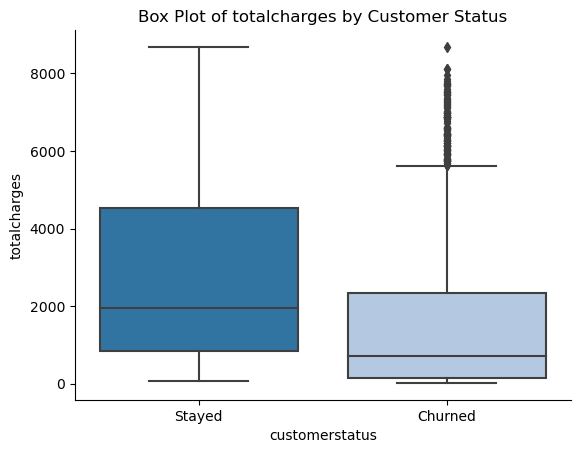

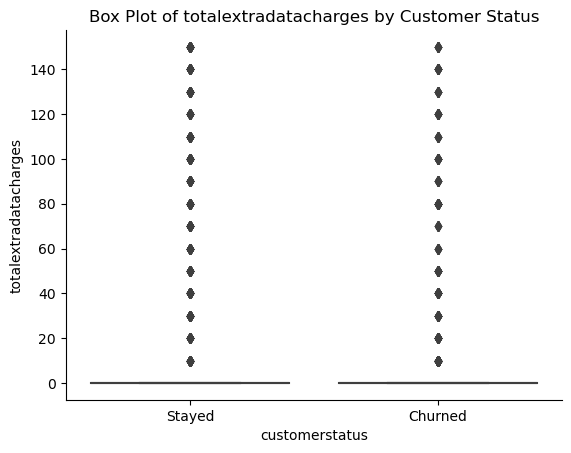

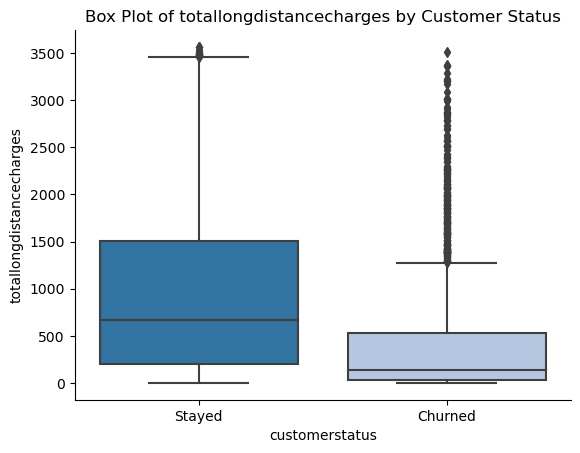

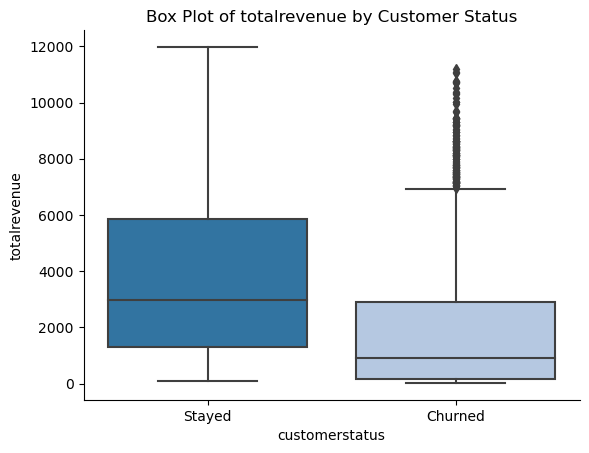

In [15]:
#List of numeric variables
numeric_vars = ['age', 'numberofdependents', 'numberofreferrals','tenureinmonths', 'avgmonthlylongdistancecharges', 'avgmonthlygbdownload',
                'monthlycharge', 'totalcharges', 'totalextradatacharges', 'totallongdistancecharges', 'totalrevenue']

for var in numeric_vars:
    sns.boxplot(x='customerstatus', y=var, data=df_copy, palette='tab20')
    plt.title(f'Box Plot of {var} by Customer Status')
    
    # Remove top and right borders
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.show()

Box plots visualizing the distribution of numeric variables across different customer churn statuses in a telecom dataset, showcasing the impact of these variables on customer churn.

In [16]:
#Specify columns to drop
columns_to_drop = ['churncategory', 'churnreason', 'customerid', 'city', 'zipcode', 'latitude', 'longitude', 'totalrefunds',
                   'gender', 'phoneservice', 'multiplelines', 'streamingtv', 'streamingmovies', 'streamingmusic',
                   'avgmonthlylongdistancecharges', 'totalextradatacharges']

#Check if columns exist before dropping
columns_to_drop = [col for col in columns_to_drop if col in df_copy.columns]

#Drop specified columns
df_copy = df_copy.drop(columns=columns_to_drop)

#Update categorical variables list
cat_vars_to_drop = ['gender', 'phoneservice', 'multiplelines', 'streamingtv', 'streamingmovies', 'streamingmusic']
cat_vars = [var for var in cat_vars if var not in cat_vars_to_drop]

#Filter numeric variables to include only existing columns
numeric_vars = [var for var in numeric_vars if var in df_copy.columns]

## Train-Test Split

The dataset is split into training and testing sets to evaluate the performance of the model. The training set is used to train the model, while the testing set is used to assess its performance on unseen data.

In [17]:
#Importing necessary libraries for data preprocessing and model building
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
#Encoding selected categorical columns
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_copy[cat_vars])
encoded_data = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(input_features=cat_vars))

#Concatenate encoded data and numeric variables
X = pd.concat([encoded_data, df_copy[numeric_vars]], axis=1)

In [19]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, df_copy['customerstatus'], test_size=0.2, random_state=42)

#Scaling
scaler = StandardScaler()
X_train[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])
X_test[numeric_vars] = scaler.transform(X_test[numeric_vars])

## Evaluation

In [20]:
#Importing necessary metrics for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

In [21]:
#Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
# Predictions and Evaluation
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Stayed') 
recall = recall_score(y_test, y_pred, pos_label='Stayed') 
f1 = f1_score(y_test, y_pred, pos_label='Stayed')
conf_matrix = confusion_matrix(y_test, y_pred)

# Creating a DataFrame for the confusion matrix with custom columns and index
df_conf_matrix = pd.DataFrame(conf_matrix, columns=['Predicted Churned', 'Predicted Stayed'], index=['Actual Churned', 'Actual Stayed'])

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Print confusion matrix DataFrame
print('Confusion Matrix:')
print(df_conf_matrix)
print('-' * 30)

Accuracy: 0.85
Precision: 0.89
Recall: 0.91
F1-Score: 0.90
Confusion Matrix:
                Predicted Churned  Predicted Stayed
Actual Churned                276               107
Actual Stayed                  85               850
------------------------------


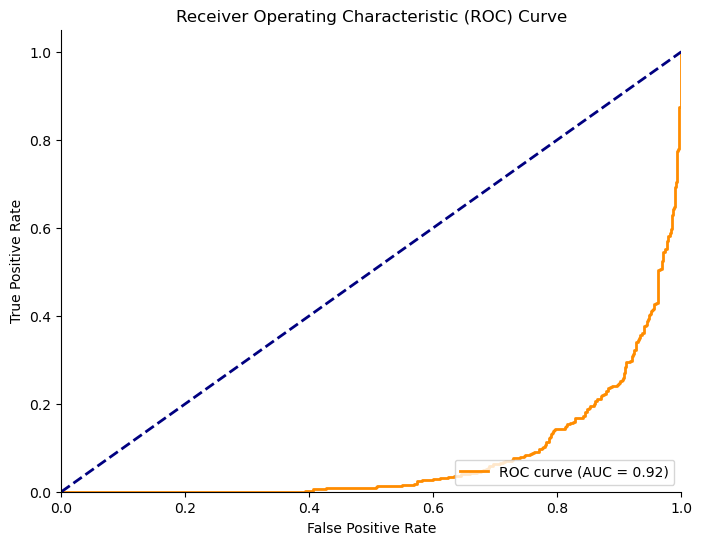

In [23]:
#Predict probabilities of the positive class
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]

#Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='Churned')

#Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_prob)

#Create the ROC curve chart
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.legend(loc='lower right')
plt.show()

Receiver Operating Characteristic (ROC) curve to illustrate the trade-off between true positive rate and false positive rate for a logistic regression model predicting customer churn in a telecom dataset. The Area Under the Curve (AUC) is calculated to quantify the model's overall performance.

## Model Adjustments 

In [24]:
from sklearn.preprocessing import LabelEncoder

# Obtain predicted probabilities
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# Experiment with different threshold values
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Convert string labels to integers
le = LabelEncoder()
y_true_encoded = le.fit_transform(y_test)

for threshold in thresholds:
    # Threshold adjustment
    y_pred_thresholded = (y_pred_proba > threshold).astype(int)
    
    # Calculate evaluation metrics
    accuracy_at_threshold = accuracy_score(y_true_encoded, y_pred_thresholded)
    precision_at_threshold = precision_score(y_true_encoded, y_pred_thresholded)
    recall_at_threshold = recall_score(y_true_encoded, y_pred_thresholded)
    f1_at_threshold = f1_score(y_true_encoded, y_pred_thresholded)

    # Get confusion matrix
    conf_matrix = confusion_matrix(y_true_encoded, y_pred_thresholded)

    # Create a DataFrame with custom columns and index for the confusion matrix
    df_conf_matrix = pd.DataFrame(conf_matrix, columns=['Predicted Churned', 'Predicted Stayed'], index=['Actual Churned', 'Actual Stayed'])

    # Print evaluation metrics
    print(f'Threshold: {threshold:.2f}')
    print(f'Accuracy: {accuracy_at_threshold:.2f}')
    print(f'Precision: {precision_at_threshold:.2f}')
    print(f'Recall: {recall_at_threshold:.2f}')
    print(f'F1-Score: {f1_at_threshold:.2f}')

    # Print confusion matrix DataFrame
    print('Confusion Matrix:')
    print(df_conf_matrix)
    print('-' * 30)

Threshold: 0.10
Accuracy: 0.73
Precision: 0.72
Recall: 1.00
F1-Score: 0.84
Confusion Matrix:
                Predicted Churned  Predicted Stayed
Actual Churned                 25               358
Actual Stayed                   0               935
------------------------------
Threshold: 0.20
Accuracy: 0.79
Precision: 0.77
Recall: 0.99
F1-Score: 0.87
Confusion Matrix:
                Predicted Churned  Predicted Stayed
Actual Churned                113               270
Actual Stayed                   7               928
------------------------------
Threshold: 0.30
Accuracy: 0.83
Precision: 0.82
Recall: 0.97
F1-Score: 0.89
Confusion Matrix:
                Predicted Churned  Predicted Stayed
Actual Churned                185               198
Actual Stayed                  29               906
------------------------------
Threshold: 0.40
Accuracy: 0.85
Precision: 0.86
Recall: 0.94
F1-Score: 0.90
Confusion Matrix:
                Predicted Churned  Predicted Stayed
Actual Churned 

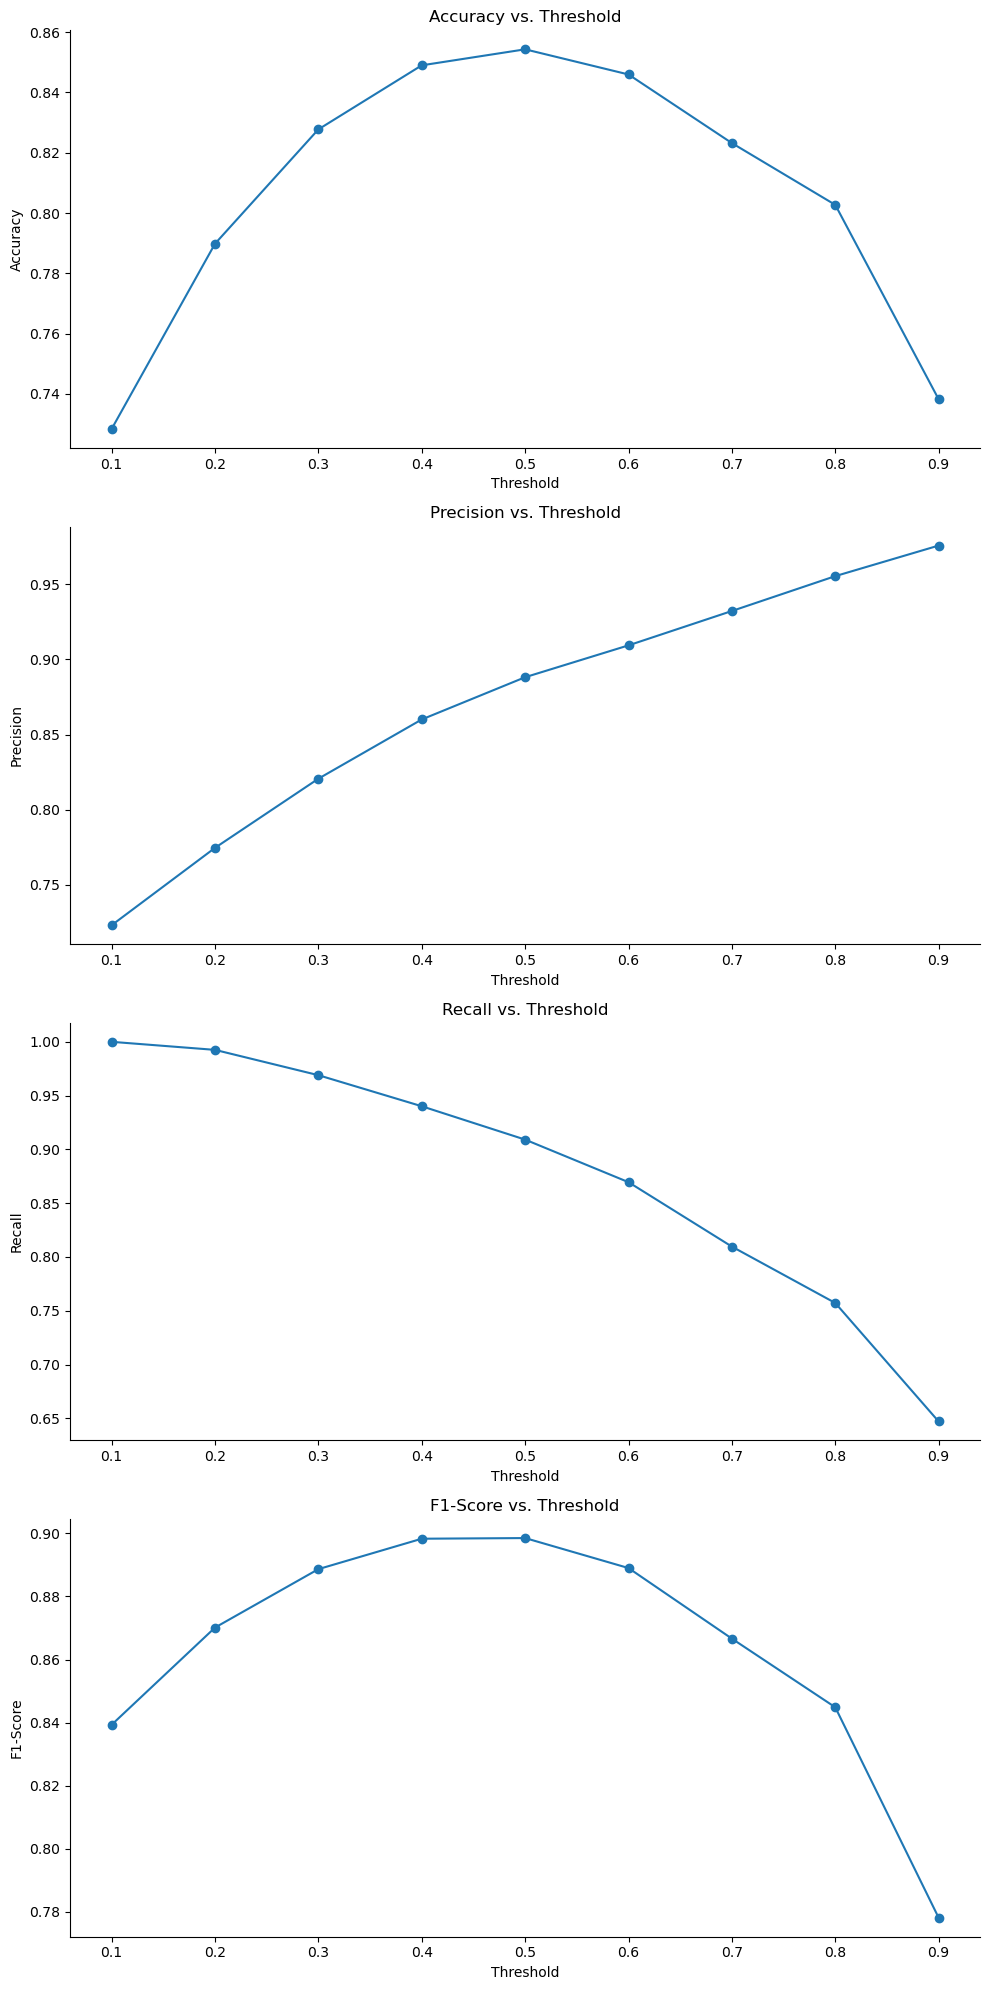

In [25]:
#Initialize empty lists to store metric values
precision_values = []
recall_values = []
f1_values = []
accuracy_values = []

#Iterate over different threshold values
for threshold in thresholds:
    y_pred_thresholded = (y_pred_proba > threshold).astype(int)

    #Calculate metrics
    precision = precision_score(y_true_encoded, y_pred_thresholded)
    recall = recall_score(y_true_encoded, y_pred_thresholded)
    f1 = f1_score(y_true_encoded, y_pred_thresholded)
    accuracy = accuracy_score(y_true_encoded, y_pred_thresholded)

    #Append values to lists
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)
    accuracy_values.append(accuracy)

#Create subplots for precision, recall, F1-score, and accuracy
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 20))

#Plot Accuracy
ax1.plot(thresholds, accuracy_values, marker='o', linestyle='-')
ax1.set_title('Accuracy vs. Threshold')
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Accuracy')
ax1.spines['right'].set_visible(False)  
ax1.spines['top'].set_visible(False)   

#Plot Precision
ax2.plot(thresholds, precision_values, marker='o', linestyle='-')
ax2.set_title('Precision vs. Threshold')
ax2.set_xlabel('Threshold')
ax2.set_ylabel('Precision')
ax2.spines['right'].set_visible(False)  
ax2.spines['top'].set_visible(False)   

# Plot Recall
ax3.plot(thresholds, recall_values, marker='o', linestyle='-')
ax3.set_title('Recall vs. Threshold')
ax3.set_xlabel('Threshold')
ax3.set_ylabel('Recall')
ax3.spines['right'].set_visible(False) 
ax3.spines['top'].set_visible(False)   

# Plot F1-Score
ax4.plot(thresholds, f1_values, marker='o', linestyle='-')
ax4.set_title('F1-Score vs. Threshold')
ax4.set_xlabel('Threshold')
ax4.set_ylabel('F1-Score')
ax4.spines['right'].set_visible(False)  
ax4.spines['top'].set_visible(False)   

plt.tight_layout()
plt.show()

Subplots illustrating how different threshold values impact the performance metrics (Accuracy, Precision, Recall, F1-Score)

# Conclusion

## Initial Evaluation

In the pursuit to predict customer churn effectively, the logistic regression model's performance was rigorously evaluated using a suite of key metrics. These metrics, including Accuracy, Precision, Recall, F1-Score, as well as insights from the confusion matrix and ROC curve, served as our compass in navigating the model's predictive capabilities.

With regards to accuracy, this metric represents the ratio of correctly predicted instances, both positive and negative, to the total number of instances in the dataset. 

Accuracy = (TP+TN)/(TP+TN+FP+FN)

True Positives (TP): Instances where the model correctly predicts the positive class.
True Negatives (TN): Instances where the model correctly predicts the negative class.
False Positives (FP): Instances where the model predicts the positive class, but the actual class is negative (Type I error).
False Negatives (FN): Instances where the model predicts the negative class, but the actual class is positive (Type II error). 

In this case, the model made correct predictions for 85% of the instances. Accuracy provides an overall view of how well the model is performing. [5]

Precision is the calculated ratio of true positives to the sum of true positives and false positives. A higher precision value signifies a lower rate of false positives. 

Precision= TP/(TP+FP)

The precision of 89% reveals the percentage of instances predicted positive by the model that were genuinely positive. [6]

Recall, also known as sensitivity or true positive rate, quantifies the model's ability to capture all positive instances.

Recall= TP/(TP+FN)

With a recall value of 0.91, the model correctly identified 91% of all positive instances. 

The F1-Score, a harmonic mean of precision and recall, provides a balanced measure of a model's performance.

F1 Score = 2×TP/(2×TP+FP+FN)

In this case, the F1-Score was computed as 90%, reflecting a balanced trade-off between precision and recall.

The previously mentioned metrics are all derived from the confusion matrix which documents the instances of true positives, true negatives, false positives, false negatives. [5][7]

Additionally, the area under the Receiver Operating Characteristic (ROC) curve, denoted as AUC, was determined to be 0.92, indicating favorable overall performance. A higher AUC value suggests a superior discriminatory ability of the model, particularly in distinguishing between positive and negative instances. [8]

## Model Adjustment Evaluation 

The process of modifying the initial evaluation through model adjustment involves exploring the impact of different classification thresholds on key performance metrics. The decision boundary on class types is influenced by the threshold, as you increase the threshold the boundary becomes more selective, requiring a higher level of confidence to classify an instance as positive. Increasing the threshold often increases precision (fewer false positives) but may decrease recall (more false negatives).This is because the model becomes more cautious in predicting the positive class, leading to fewer positive predictions overall. [9]

Adjusting the threshold involves a trade-off between precision and recall. The model can be made more "conservative" (higher threshold, higher precision, lower recall) or more "inclusive" (lower threshold, higher recall, lower precision). Which is critical depending on the specific requirements of your application. For instance, a high recall is suitable for scenarios where identifying nearly all actual positive cases is crucial, even at the cost of increased false positives such as cancer detection. 

In this case maintaining high accuracy is paramount, for that reason the default threshold of 0.5 is ideal as it maintains high accuracy while balancing both precision and recall at the same time. The process of adjusting the model and exploring different thresholds is essential for tailoring the predictive capabilities of the logistic regression model to meet the specific needs and priorities. The iterative evaluation provides a deeper understanding of how the model performs under various conditions, facilitating more informed decision-making. These evaluations provide an overview into the logistic regression model's performance and its sensitivity to threshold adjustments.

In conclusion, this project demonstrates the power of machine learning in predicting customer churn, a demanding business concern. By leveraging data analysis techniques and predictive models businesses can derive valuable insights that drive strategic decision-making aimed at retaining their customer base.

## References:
    
[1] Frankenfield, Jake. “Churn Rate: What It Means, Examples, and Calculations.” Investopedia, 18 May 2022, www.investopedia.com/terms/c/churnrate.asp.

[2] Zhuang, Shi Long. “Telecom Customer Churn Prediction.” Kaggle, 6 July 2022, www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics. 

[3] Delua, Julianna. “Supervised vs. Unsupervised Learning: What’s the Difference?” IBM , 12 Mar. 2021, www.ibm.com/blog/supervised-vs-unsupervised-learning/

[4] Castro, Horacio  Matias, and Juliana  Carvalho Ferreira. “Linear and Logistic Regression Models: When to Use and How to Interpret Them?” National Library of Medicine, National Center for Biotechnology Information , 25 Nov. 2022, www.ncbi.nlm.nih.gov/pmc/articles/PMC9747134/

[5] Shung, Koo Ping. “Accuracy, Precision, Recall or F1?” Medium, Towards Data Science, 10 Apr. 2020, towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

[6] Tigerschiold, Ted. “What Is Accuracy, Precision, Recall and F1 Score?” Labelf, 17 Nov. 2022, www.labelf.ai/blog/what-is-accuracy-precision-recall-and-f1-score

[7] “Confusion Matrix in Machine Learning.” GeeksforGeeks, 21 Dec. 2023, www.geeksforgeeks.org/confusion-matrix-machine-learning/

[8] Dash, Shailey. “Understanding the ROC and AUC Intuitively.” Medium, 7 Feb. 2023, medium.com/@shaileydash/understanding-the-roc-and-auc-intuitively-31ca96445c02

[9] Nguyen, Pemi. “Classification.” University of Washington, 2022, courses.cs.washington.edu/courses/cse416/22sp/lectures/5/lecture_5.pdf